In [2]:
%matplotlib inline
%run Pipeline//upload_and_vizualize 
%run Pipeline//classify_and_evaluate 
%run Pipeline//aux
import csv
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pylab as pl
import seaborn as sn

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [382]:
df_violations = read_file('data/ICIS-AIR_downloads/ICIS-AIR_VIOLATION_HISTORY.csv')

In [18]:
def get_groupby_counts(df, col_name):
    tot_count = df[col_name].count()
    count_per_group = df[col_name].value_counts().to_frame()
    count_per_group['Proportion'] = count_per_group[col_name] / tot_count
    
    count_per_count = count_per_group[col_name].value_counts().to_frame()
    count_per_count['Proportion'] = count_per_count[col_name] / count_per_count[col_name].sum()
    return tot_count, count_per_group, count_per_count

In [19]:
tot_count_viol, count_per_group_viol,  count_per_count_viol = get_groupby_counts(df_violations, 'STATE_CODE')

In [261]:
df_violations

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,...,HPV_RESOLVED_DATE_year,HPV_RESOLVED_DATE_day_num,HPV_RESOLVED_DATE_day_of_week,HPV_RESOLVED_DATE_month,HPV_RESOLVED_DATE_month_num,EARLIEST_FRV_DETERM_DATE_year,EARLIEST_FRV_DETERM_DATE_day_num,EARLIEST_FRV_DETERM_DATE_day_of_week,EARLIEST_FRV_DETERM_DATE_month,EARLIEST_FRV_DETERM_DATE_month_num
0,CT0000000900700108,3400302038,State,CT,NaN,CT000A0000090070010800028,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,...,1996,1.0,Tuesday,October,10,None,NaN,None,None,None
1,CT0000000900700108,3400302043,State,CT,NaN,CT000A0000090070010800158,FRV,CAATVP,Title V Permits,300000282,...,None,NaN,None,None,None,2013,4.0,Friday,May,05
2,CT0000000900900110,3400302044,State,CT,NaN,CT000A0000090090011000026,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,...,1996,1.0,Tuesday,October,10,None,NaN,None,None,None
3,CT0000000900900110,3400302045,State,CT,NaN,CT000A0000090090011000037,HPV,CAASIP,State Implementation Plan for National Primary...,10461 300000005,...,1999,3.0,Thursday,September,09,None,NaN,None,None,None
4,CT0000000900300125,3400302055,State,CT,NaN,CT000A0000090030012500017,HPV,CAASIP,State Implementation Plan for National Primary...,300000242 300000329,...,2007,1.0,Tuesday,July,07,None,NaN,None,None,None
5,CT0000000900508907,3400302093,State,CT,NaN,CT000A0000090050890700012,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000329,...,2010,1.0,Tuesday,November,11,None,NaN,None,None,None
6,CT0000000900100078,3400302098,State,CT,NaN,CT000A0000090010007800021,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000329,...,2009,3.0,Thursday,September,09,None,NaN,None,None,None
7,CT0000000901501125,3400302109,State,CT,NaN,CT000A0000090150112500209,HPV,CAATVP,Title V Permits,10193,...,2014,2.0,Wednesday,June,06,None,NaN,None,None,None
8,CT0000000900300171,3400302111,State,CT,NaN,CT000A0000090030017100002,HPV,CAASIP,State Implementation Plan for National Primary...,300000210,...,1999,5.0,Saturday,May,05,None,NaN,None,None,None
9,CT0000000900109058,3400302112,State,CT,NaN,CT000A0000090010905800007,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000005,...,2009,1.0,Tuesday,January,01,None,NaN,None,None,None


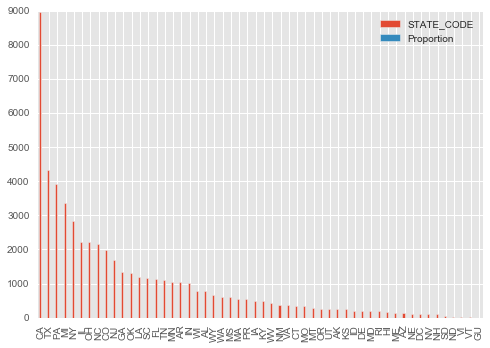

In [25]:
count_per_group_viol.plot(kind='bar')

In [383]:
date_format ='%m-%d-%Y'
date_attributes = ['HPV_DAYZERO_DATE','HPV_RESOLVED_DATE','EARLIEST_FRV_DETERM_DATE']
get_occupied_frame(df_violations,date_attributes,date_format)

In [384]:
df_violations.head(1)

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,EARLIEST_FRV_DETERM_DATE,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE,HPV_DAYZERO_DATE_datetime,HPV_DAYZERO_DATE_day_num,HPV_DAYZERO_DATE_weekday,HPV_DAYZERO_DATE_month_name,HPV_DAYZERO_DATE_month_num,HPV_DAYZERO_DATE_year,HPV_RESOLVED_DATE_datetime,HPV_RESOLVED_DATE_day_num,HPV_RESOLVED_DATE_weekday,HPV_RESOLVED_DATE_month_name,HPV_RESOLVED_DATE_month_num,HPV_RESOLVED_DATE_year,EARLIEST_FRV_DETERM_DATE_datetime,EARLIEST_FRV_DETERM_DATE_day_num,EARLIEST_FRV_DETERM_DATE_weekday,EARLIEST_FRV_DETERM_DATE_month_name,EARLIEST_FRV_DETERM_DATE_month_num,EARLIEST_FRV_DETERM_DATE_year
0,CT0000000900700108,3400302038,State,CT,NaN,CT000A0000090070010800028,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,NaN,05-28-1996,10-15-1996,1996-05-28,1.0,Tuesday,May,05,1996,1996-10-15 00:00:00,1.0,Tuesday,October,10,1996,NaN,NaN,NaN,NaN,NaN,NaN


In [385]:
def create_date_charts(df, original_date_columns):
    for date_column in original_date_columns:
        df.sort([date_column+'_month_num']).groupby([date_column+'_month_name'], sort=False).size().to_frame().plot(kind='bar',color ='blue')
        df.sort([date_column+'_day_num']).groupby([date_column+'_weekday'], sort=False).size().to_frame().plot(kind='bar',color='green')
        df.groupby([date_column+'_year']).size().to_frame().plot(kind='area',color='orange')
    plt.show()

In [386]:
# DAYS TO RESOLVE 

df_violations_no_date_na = df_violations.dropna(subset=['HPV_RESOLVED_DATE_datetime','HPV_DAYZERO_DATE_datetime'])
df_violations_no_date_na['DAYS_TO_RESOLVE'] = pd.to_datetime(df_violations_no_date_na['HPV_RESOLVED_DATE_datetime']).sub(pd.to_datetime(df_violations_no_date_na['HPV_DAYZERO_DATE_datetime']))

def day_to_int(series_row):
    return int(str(series_row).split()[0])
df_violations_no_date_na['DAYS_TO_RESOLVE_INT'] = df_violations_no_date_na.DAYS_TO_RESOLVE.apply(day_to_int)

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [387]:
df_violations_no_date_na.count()

PGM_SYS_ID                             32938
ACTIVITY_ID                            32938
AGENCY_TYPE_DESC                       32938
STATE_CODE                             29642
AIR_LCON_CODE                           8510
COMP_DETERMINATION_UID                 32938
ENF_RESPONSE_POLICY_CODE               32938
PROGRAM_CODES                          32938
PROGRAM_DESCS                          32938
POLLUTANT_CODES                        29280
POLLUTANT_DESCS                        29280
EARLIEST_FRV_DETERM_DATE                2661
HPV_DAYZERO_DATE                       32938
HPV_RESOLVED_DATE                      32938
HPV_DAYZERO_DATE_datetime              32938
HPV_DAYZERO_DATE_day_num               32938
HPV_DAYZERO_DATE_weekday               32938
HPV_DAYZERO_DATE_month_name            32938
HPV_DAYZERO_DATE_month_num             32938
HPV_DAYZERO_DATE_year                  32938
HPV_RESOLVED_DATE_datetime             32938
HPV_RESOLVED_DATE_day_num              32938
HPV_RESOLV

In [388]:
pd.set_option('max_columns', 100)
df_violations_no_date_na.head(3)

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,EARLIEST_FRV_DETERM_DATE,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE,HPV_DAYZERO_DATE_datetime,HPV_DAYZERO_DATE_day_num,HPV_DAYZERO_DATE_weekday,HPV_DAYZERO_DATE_month_name,HPV_DAYZERO_DATE_month_num,HPV_DAYZERO_DATE_year,HPV_RESOLVED_DATE_datetime,HPV_RESOLVED_DATE_day_num,HPV_RESOLVED_DATE_weekday,HPV_RESOLVED_DATE_month_name,HPV_RESOLVED_DATE_month_num,HPV_RESOLVED_DATE_year,EARLIEST_FRV_DETERM_DATE_datetime,EARLIEST_FRV_DETERM_DATE_day_num,EARLIEST_FRV_DETERM_DATE_weekday,EARLIEST_FRV_DETERM_DATE_month_name,EARLIEST_FRV_DETERM_DATE_month_num,EARLIEST_FRV_DETERM_DATE_year,DAYS_TO_RESOLVE
0,CT0000000900700108,3400302038,State,CT,NaN,CT000A0000090070010800028,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,NaN,05-28-1996,10-15-1996,1996-05-28,1.0,Tuesday,May,05,1996,1996-10-15 00:00:00,1.0,Tuesday,October,10,1996,NaN,NaN,NaN,NaN,NaN,NaN,140 days
2,CT0000000900900110,3400302044,State,CT,NaN,CT000A0000090090011000026,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,NaN,05-28-1996,10-15-1996,1996-05-28,1.0,Tuesday,May,05,1996,1996-10-15 00:00:00,1.0,Tuesday,October,10,1996,NaN,NaN,NaN,NaN,NaN,NaN,140 days
3,CT0000000900900110,3400302045,State,CT,NaN,CT000A0000090090011000037,HPV,CAASIP,State Implementation Plan for National Primary...,10461 300000005,NITROGEN OXIDES NO2 Sulfur dioxide,NaN,08-21-1998,09-30-1999,1998-08-21,4.0,Friday,August,08,1998,1999-09-30 00:00:00,3.0,Thursday,September,09,1999,NaN,NaN,NaN,NaN,NaN,NaN,405 days


In [264]:
print('total_count_dayzero: ',len(df_violations.HPV_DAYZERO_DATE.dropna()),' total_count_resolved: ',len(df_violations.HPV_RESOLVED_DATE.dropna()))

total_count_dayzero:  35469  total_count_resolved:  41728


In [113]:
df_violations_dateinfo = pd.concat([df_violations,df_violations_hpv_date_info], join='outer')

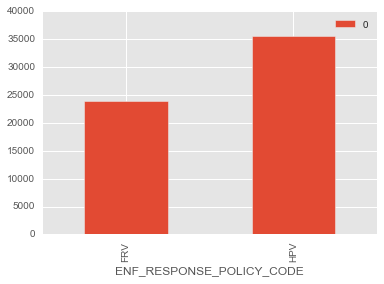

In [198]:
df_violations_hpv_date_info.groupby('ENF_RESPONSE_POLICY_CODE').size().to_frame().plot(kind='bar')

In [209]:
emissions = read_file('data/POLL_RPT_COMBINED_EMISSIONS.csv')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (3,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [271]:
emissions.head()

,REPORTING_YEAR,REGISTRY_ID,PGM_SYS_ACRNM,PGM_SYS_ID,POLLUTANT_NAME,ANNUAL_EMISSION,UNIT_OF_MEASURE,NEI_TYPE,NEI_HAP_VOC_FLAG
0,2006,110002481430,TRIS,06095TRBTC651DA,Copper,63.30,Pounds,NaN,NaN
1,2006,110000410975,TRIS,49443SNCHM4925E,Barium compounds -- TRI,0.00,Pounds,NaN,NaN
2,2006,110000410975,TRIS,49443SNCHM4925E,Lead compounds,0.12,Pounds,NaN,NaN
3,2006,110000410975,TRIS,49443SNCHM4925E,Mercury,0.01,Pounds,NaN,NaN
4,2006,110000416540,TRIS,53051RBCRPN92W1,Toluene,1164.00,Pounds,NaN,NaN


In [439]:
emissions.UNIT_OF_MEASURE.value_counts()

Pounds    7499708
MTCO2e     128586
Name: UNIT_OF_MEASURE, dtype: int64

In [ ]:
cross_vectors(emissionsemissions[emissions.UNIT_OF_MEASURE=='Pounds'][emissions.UNIT_OF_MEASURE=='Pounds'], 'POLLUTANT_NAME', 'ANNUAL_EMISSION')


In [279]:
emissions[['POLLUTANT_NAME','ANNUAL_EMISSION']].groupby('POLLUTANT_NAME').mean()

,ANNUAL_EMISSION
POLLUTANT_NAME,
.alpha.-Hexachlorocyclohexane,11.000000
"1,1,1,2-Tetrachloroethane",304.933233
"1,1,1-Trichloroethane",776.529731
"1,1,2,2-Tetrachloroethane",35.522883
"1,1,2-Trichloroethane",94.594339
"1,1-Dichloroethane",64.770820
"1,1-Dichloroethylene",59.344925
"1,1-Dimethylhydrazine",48.953552
"1,2,3,4,5,6-Hexachlorocyclohexane",4.456438


In [4]:
facilities = read_file('data/ICIS-AIR_downloads/ICIS-AIR_FACILITIES.csv')

In [247]:
facilities.columns


Index(['PGM_SYS_ID', 'REGISTRY_ID', 'FACILITY_NAME', 'STREET_ADDRESS', 'CITY',
       'COUNTY_NAME', 'STATE', 'ZIP_CODE', 'EPA_REGION', 'SIC_CODES',
       'NAICS_CODES', 'FACILITY_TYPE_CODE', 'AIR_POLLUTANT_CLASS_CODE',
       'AIR_POLLUTANT_CLASS_DESC', 'AIR_OPERATING_STATUS_CODE',
       'AIR_OPERATING_STATUS_DESC', 'CURRENT_HPV', 'LOCAL_CONTROL_REGION_CODE',
       'LOCAL_CONTROL_REGION_NAME'],
      dtype='object')

In [249]:
afs_facilities.columns

Index(['PLANT_ID', 'AFS_ID', 'PLANT_NAME', 'EPA_REGION',
       'PLANT_STREET_ADDRESS', 'PLANT_CITY', 'PLANT_COUNTY', 'STATE',
       'STATE_NUMBER', 'ZIP_CODE', 'PRIMARY_SIC_CODE', 'SECONDARY_SIC_CODE',
       'NAICS_CODE', 'AFS_GOV_FACILITY_CODE', 'FEDERALLY_REPORTABLE',
       'EPA_CLASSIFICATION_CODE', 'OPERATING_STATUS', 'EPA_COMPLIANCE_STATUS',
       'CURRENT_HPV', 'LOCAL_CONTROL_REGION', 'STATE_COMPLIANCE_STATUS'],
      dtype='object')

In [232]:
afs_facilities = read_file('data/afs_downloads/AFS_FACILITIES.csv')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [255]:
afs_facilities = read_file('data/afs_downloads/AFS_AIR_PRG_HIST_COMPLIANCE.csv')

In [259]:
afs_facilities.columns

Index(['AFS_ID', 'AIR_PROGRAM_CODE', 'HISTORICAL_COMPLIANCE_DATE',
       'HISTORICAL_COMPLIANCE_STATUS'],
      dtype='object')

In [3]:
icis_facilities = read_file('data/ICIS_FACILITIES.csv')

In [10]:
facilities.count()

PGM_SYS_ID                   236960
REGISTRY_ID                  236885
FACILITY_NAME                236960
STREET_ADDRESS               236779
CITY                         236939
COUNTY_NAME                  236960
STATE                        236960
ZIP_CODE                     236960
EPA_REGION                   236960
SIC_CODES                    197280
NAICS_CODES                  236959
FACILITY_TYPE_CODE           210025
AIR_POLLUTANT_CLASS_CODE     234919
AIR_POLLUTANT_CLASS_DESC     234919
AIR_OPERATING_STATUS_CODE    235634
AIR_OPERATING_STATUS_DESC    235634
CURRENT_HPV                  236960
LOCAL_CONTROL_REGION_CODE     10448
LOCAL_CONTROL_REGION_NAME     10448
dtype: int64

In [19]:
icis_facilities.count()

ICIS_FACILITY_INTEREST_ID    443201
NPDES_ID                     443201
FACILITY_UIN                 437971
FACILITY_TYPE_CODE           278578
FACILITY_NAME                443199
LOCATION_ADDRESS             442953
SUPPLEMENTAL_ADDRESS_TEXT     59479
CITY                         428902
COUNTY_CODE                  344666
STATE_CODE                   443137
ZIP                          443028
GEOCODE_LATITUDE             381215
GEOCODE_LONGITUDE            381215
IMPAIRED_WATERS               56959
dtype: int64

In [8]:
facilities.merge(icis_facilities, how='inner', on='FACILITY_NAME').

,PGM_SYS_ID,REGISTRY_ID,FACILITY_NAME,STREET_ADDRESS,CITY_x,COUNTY_NAME,STATE,ZIP_CODE,EPA_REGION,SIC_CODES,...,FACILITY_TYPE_CODE_y,LOCATION_ADDRESS,SUPPLEMENTAL_ADDRESS_TEXT,CITY_y,COUNTY_CODE,STATE_CODE,ZIP,GEOCODE_LATITUDE,GEOCODE_LONGITUDE,IMPAIRED_WATERS
0,MN0000002700300002,1.100087e+11,GREIF BROS CORP,3755 UNIVERSITY AVE,COLUMBIA HEIGHTS,Anoka,MN,55421,5,2655,...,POF,10 MALCOLM AVE,NaN,TETERBORO,NJ003,NJ,07608,40.854194,-74.069306,303(D) Listed
1,IL000197050AAM,1.100014e+11,GREIF BROS CORP,1225 DAVIES ST,LOCKPORT,Will,IL,60441-2804,5,3089,...,POF,10 MALCOLM AVE,NaN,TETERBORO,NJ003,NJ,07608,40.854194,-74.069306,303(D) Listed
2,MN0000002712300352,1.100088e+11,GREIF BROS CORP,551 BARGE CHANNEL RD,SAINT PAUL,Ramsey,MN,55107,5,2449,...,POF,10 MALCOLM AVE,NaN,TETERBORO,NJ003,NJ,07608,40.854194,-74.069306,303(D) Listed
3,GA0000001308900030,1.100643e+11,GREIF BROS CORP,2002 LITHONIA INDUSTRIAL BOULEVARD,LITHONIA,DeKalb,GA,30058,4,2655,...,POF,10 MALCOLM AVE,NaN,TETERBORO,NJ003,NJ,07608,40.854194,-74.069306,303(D) Listed
4,MN0000002700300059,1.100088e+11,QUEBECOR PRINTING,5101 INDUSTRIAL BLVD,FRIDLEY,Anoka,MN,55432,5,2752,...,NaN,300 BROWN RD,NaN,SIMPSON COUNTY,KY213,KY,42134,36.746222,-86.567333,NaN
5,TNNDC0004703700052,1.100004e+11,QUEBECOR PRINTING,3215 POWELL AVE.,NASHVILLE,Davidson,TN,37204,4,2721,...,NaN,300 BROWN RD,NaN,SIMPSON COUNTY,KY213,KY,42134,36.746222,-86.567333,NaN
6,MN0000002777700150,1.100244e+11,BEMIDJI BITUMINOUS INC,4883 SCRIBNER RD NW,BEMIDJI,Beltrami,MN,56601,5,2951,...,NaN,4883 SCRIBNER RD NW,NaN,BEMIDJI,NaN,MN,56601,47.516706,-95.013239,NaN
7,MN0000002701300077,1.100087e+11,HINIKER CO,58766 240TH ST,MANKATO,Blue Earth,MN,560015596,5,NaN,...,POF,58766 240TH STREET,NaN,MANKATO,MN013,MN,56002,44.232443,-93.933397,NaN
8,MN0000002701700002,1.100004e+11,SAPPI CLOQUET LLC,2201 AVENUE B,CLOQUET,Carlton,MN,557202155,5,NaN,...,POF,2201 AVE B - MILL EAST END,SCANLON WOOD YARD,CLOQUET,MN017,MN,55720,46.725667,-92.429500,NaN
9,MN0000002702500006,1.100088e+11,ARDENT MILLS LLC,265 BREMER AVE,RUSH CITY,Chisago,MN,550699047,5,NaN,...,COR,101 NORMANSKILL ST,NaN,ALBANY,NY001,NY,12202-2155,42.621000,-73.763000,303(D) Listed


In [214]:
pollutants = read_file('data/ICIS-AIR_downloads/ICIS-AIR_POLLUTANTS.csv')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [251]:
pollutants.columns

Index(['PGM_SYS_ID', 'POLLUTANT_CODE', 'POLLUTANT_DESC', 'SRS_ID',
       'CHEMICAL_ABSTRACT_SERVICE_NMBR', 'AIR_POLLUTANT_CLASS_CODE',
       'AIR_POLLUTANT_CLASS_DESC'],
      dtype='object')

In [216]:
formal_actions = read_file('data/ICIS-AIR_downloads/ICIS-AIR_FORMAL_ACTIONS.csv')

In [252]:
formal_actions.columns

Index(['PGM_SYS_ID', 'ACTIVITY_ID', 'ENF_IDENTIFIER', 'ACTIVITY_TYPE_CODE',
       'ACTIVITY_TYPE_DESC', 'STATE_EPA_FLAG', 'ENF_TYPE_CODE',
       'ENF_TYPE_DESC', 'SETTLEMENT_ENTERED_DATE', 'PENALTY_AMOUNT'],
      dtype='object')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


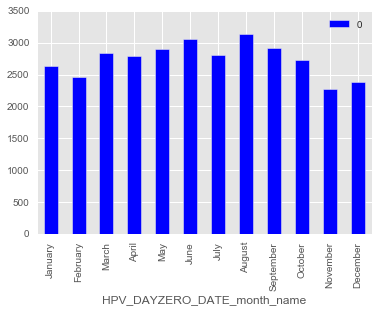

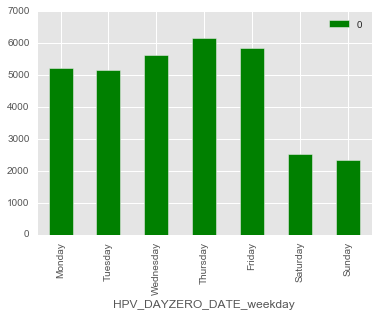

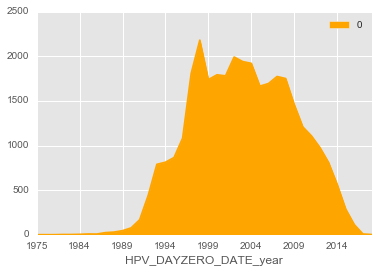

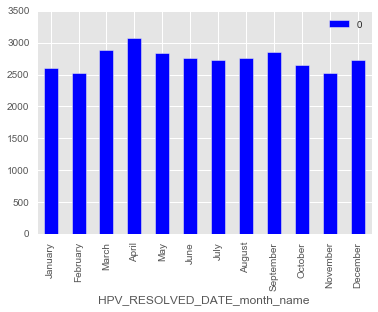

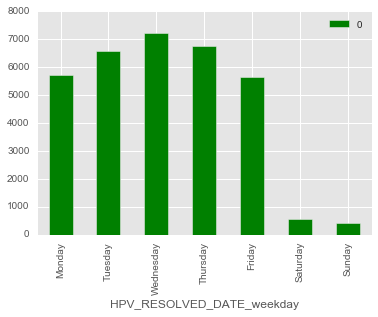

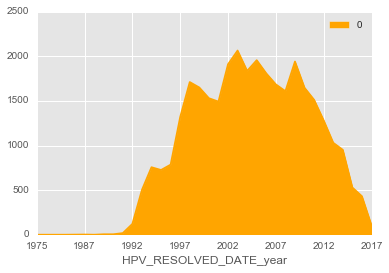

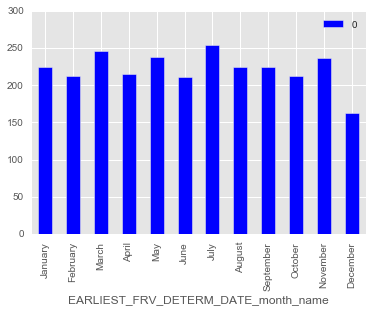

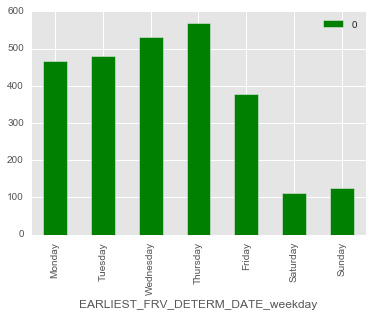

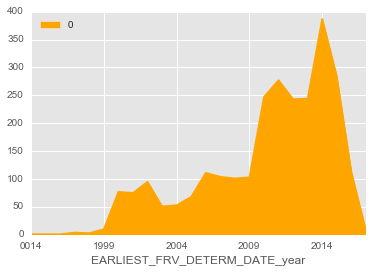

In [389]:
create_date_charts(df_violations_no_date_na, date_attributes)

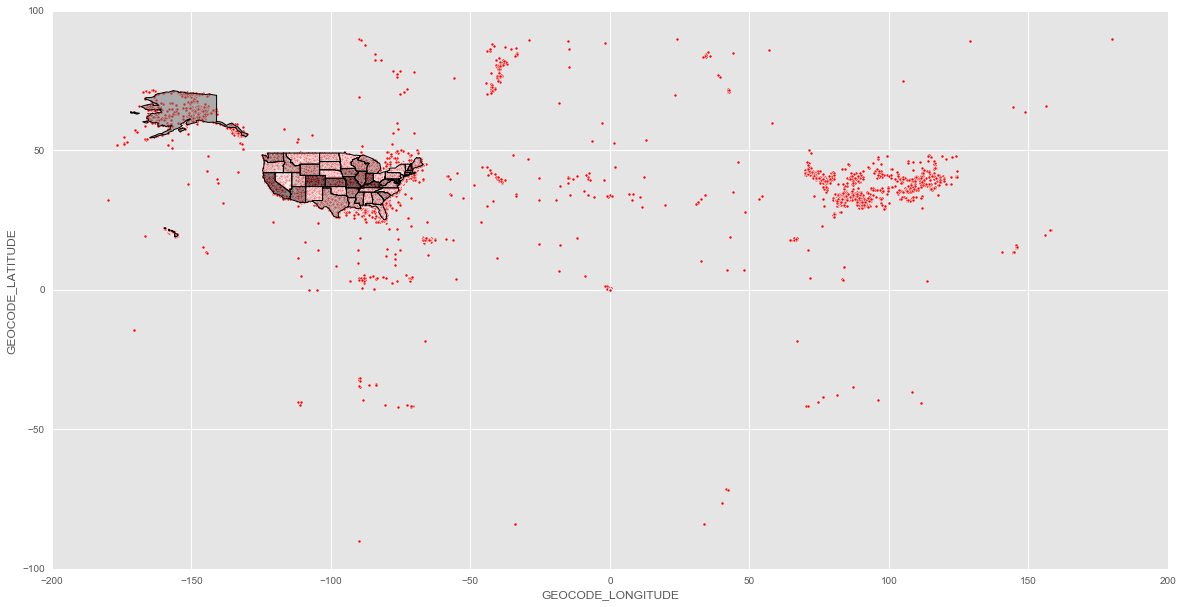

In [429]:
import geopandas as gpd
fname = 'data/us_states.geojson'
us = gpd.read_file(fname)
base = us.plot(figsize = (20,20))
npdes.plot(ax=base,kind='scatter', x='GEOCODE_LONGITUDE', y='GEOCODE_LATITUDE', s=9, c='red', figsize=(20,20))

In [431]:
## Can standardized violation informaton and concatonate violation dataFrames


In [435]:
def day_to_int(series_row):
    return int(str(series_row).split()[0])
df_violations_no_date_na['DAYS_TO_RESOLVE_INT'] = df_violations_no_date_na.DAYS_TO_RESOLVE.apply(day_to_int)

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


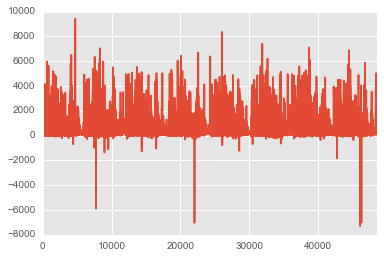

In [438]:
df_violations_no_date_na.DAYS_TO_RESOLVE_INT.plot()